# Trabalho VI - Caixeiro Viajante (Simulated Annealing)
### Gabriel Victor Carvalho Rocha - 2018054907

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def distancia_euclidiana(xi, yi, xj, yj):
    return np.sqrt(np.square(xi - xj) + np.square(yi - yj))

In [3]:
def gera_distancias(x, y, N):
    dist = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            dist[i, j] = distancia_euclidiana(x[i], y[i], x[j], y[j])
    return dist

In [4]:
def custo_caminho(cam, dist, N):
    ener = 0
    for i in range(N - 1):
        ener += dist[cam[i], cam[i + 1]]
    ener += dist[cam[0], cam[N - 1]]
    return ener

In [5]:
def inicio(N):
    x = [np.random.uniform(0, 1) for _ in range(N)]
    y = [np.random.uniform(0, 1) for _ in range(N)]
    cam = np.arange(N)
    np.random.shuffle(cam)
    return x, y, cam

In [6]:
def novo_caminho(cam, dist, N, T):
    ncam = np.zeros(N, dtype=np.int16)
    i = np.random.randint(N)
    j = i
    while i == j:
        j = np.random.randint(N)
    if i > j:
        ini = j
        fim = i
    else:
        ini = i
        fim = j
    
    for k in range(N):
        if k >= ini and k <= fim:
            ncam[k] = cam[fim - k + ini]
        else:
            ncam[k] = cam[k]
    
    esq = ini - 1
    if esq < 0: esq = N - 1
    dire = fim + 1
    if dire > (N - 1): dire = 0
    de = - dist[cam[esq], cam[ini]] - dist[cam[dire], cam[fim]] + dist[ncam[esq], ncam[ini]] + dist[ncam[dire], ncam[fim]]

    if de < 0: 
        return ncam
    elif np.random.uniform(0, 1) < np.exp(- de / T):
        return ncam
    return cam 

In [7]:
def monte_carlo(cam, dist, Ti, Tf, dt, N):
    T = Ti
    custos = np.array([])
    caminhos = []
    count = 0
    while T > Tf:
        for _ in range(100):
            cam = novo_caminho(cam, dist, N, T)
        T = T * dt
        custos = np.append(custos, custo_caminho(cam, dist, N))
        if count % 25 == 0:
            caminhos.append(cam)
        count += 1
    caminhos.append(cam)
    return custos, caminhos

In [8]:
def grafo_caminho(x, y, cam, N):
    caminho_x = np.zeros(N, dtype=np.float32)
    caminho_y = np.zeros(N, dtype=np.float32)
    for i in range(N):
        caminho_x[i] = x[cam[i]]
        caminho_y[i] = y[cam[i]]
    return caminho_x, caminho_y

In [9]:
def gera_todos_caminhos(caminhos, x, y, N):
    c_x, c_y = [], []

    for i in range(len(caminhos)):
        n_x, n_y = grafo_caminho(x, y, caminhos[i], N)
        c_x.append(n_x)
        c_y.append(n_y)
    return c_x, c_y

In [10]:
def plota_cidades(x, y, title, c="steelblue"):
    plt.plot(x, y, color=c)
    plt.scatter(x, y, color='black')
    plt.title(title)
    plt.show()

In [11]:
def gera_todos_grafos_cidades(caminhos, x, y, N):
    c_x, c_y = gera_todos_caminhos(caminhos, x, y, N)
    for i in range(len(caminhos)):
        if i == len(caminhos) - 1:
            plota_cidades(c_x[i], c_y[i], "Final")
        elif i != 0:
            plota_cidades(c_x[i], c_y[i], f"{i * 25}º variação de temperatura")
        else:
            plota_cidades(c_x[i], c_y[i], "Inicio")

In [12]:
def gera_grafico_custo_temperatura(custos):
    plt.title("Simulted Annealing")
    plt.xlabel("Iterações por variação de temperatura")
    plt.ylabel("Custo (Energia)")
    plt.plot(custos, color="steelblue")
    plt.show()

In [13]:
def simulated_annealing(N, Ti, dt, Tf):
    x, y, cam = inicio(N)

    dist = gera_distancias(x, y, N)

    custos, caminhos = monte_carlo(cam, dist, Ti, Tf, dt, N)
    
    return caminhos, custos, x, y, N

# Para 15 cidades:

In [14]:
caminhos, custos, x, y, N = simulated_annealing(N=15, Ti=10, dt=0.9, Tf=0.001)

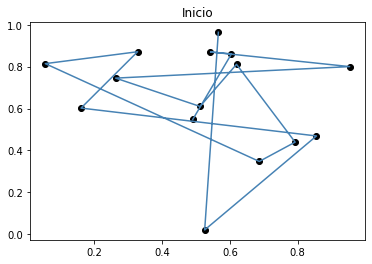

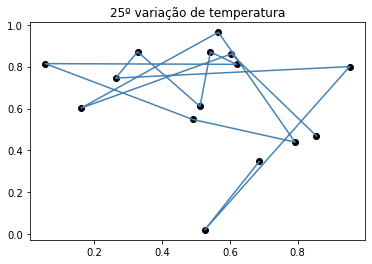

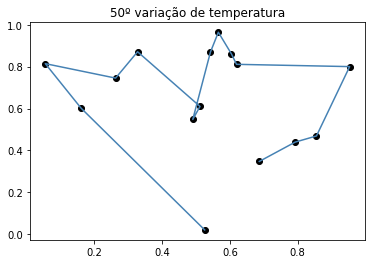

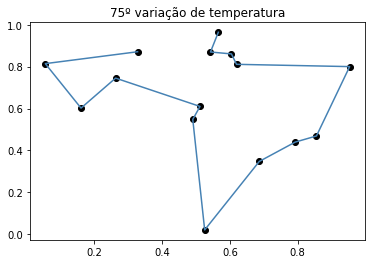

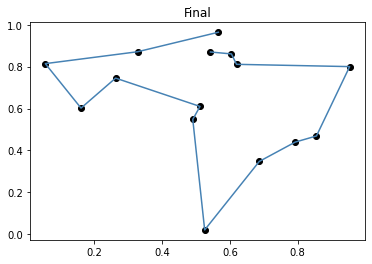

In [15]:
gera_todos_grafos_cidades(caminhos, x, y, N)

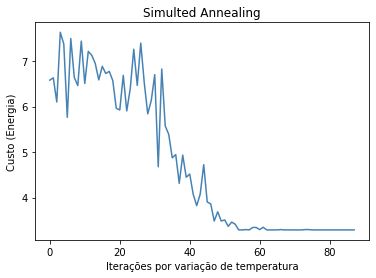

In [16]:
gera_grafico_custo_temperatura(custos)

# Para 30 cidades:

In [17]:
caminhos, custos, x, y, N = simulated_annealing(N=30, Ti=10, dt=0.9, Tf=0.001)

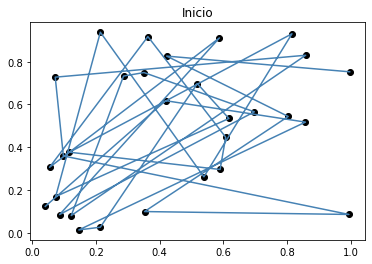

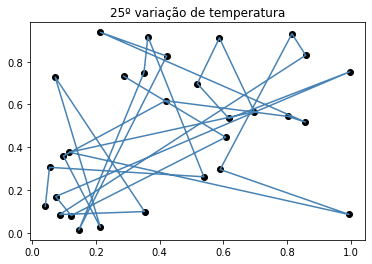

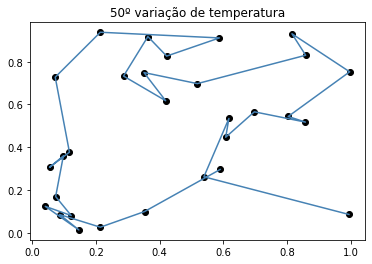

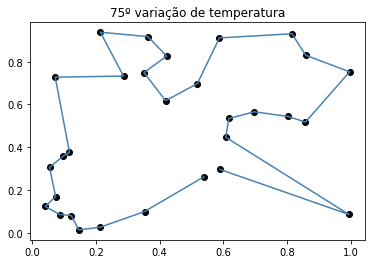

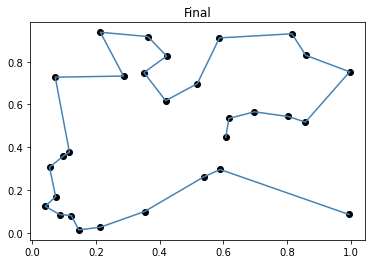

In [18]:
gera_todos_grafos_cidades(caminhos, x, y, N)

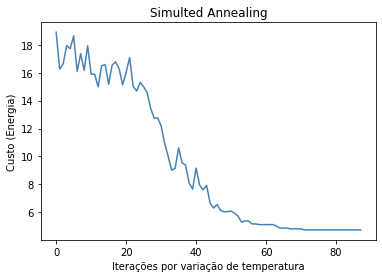

In [19]:
gera_grafico_custo_temperatura(custos)

# Para 45 cidades

In [20]:
caminhos, custos, x, y, N = simulated_annealing(N=45, Ti=10, dt=0.9, Tf=0.001)

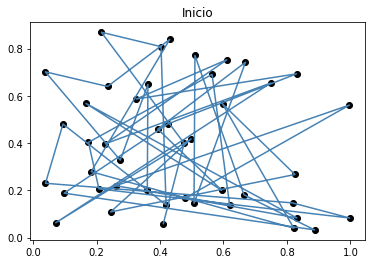

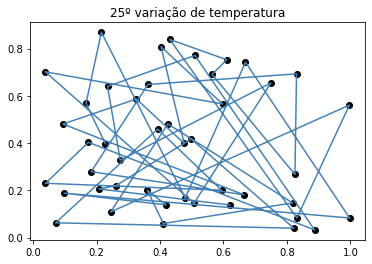

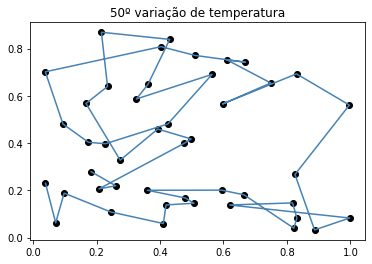

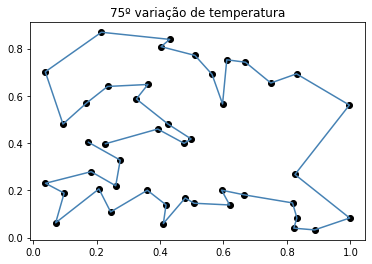

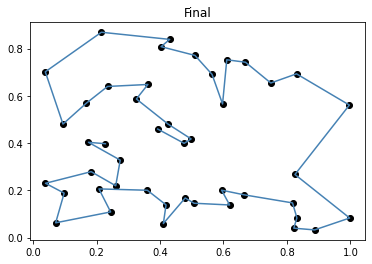

In [21]:
gera_todos_grafos_cidades(caminhos, x, y, N)

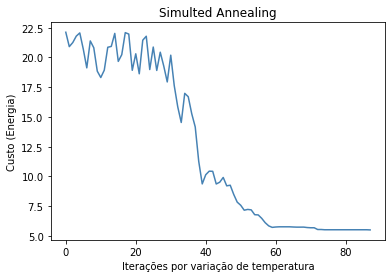

In [22]:
gera_grafico_custo_temperatura(custos)

# Para 60 cidades

In [23]:
caminhos, custos, x, y, N = simulated_annealing(N=60, Ti=10, dt=0.9, Tf=0.001)

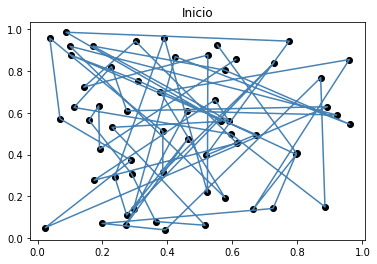

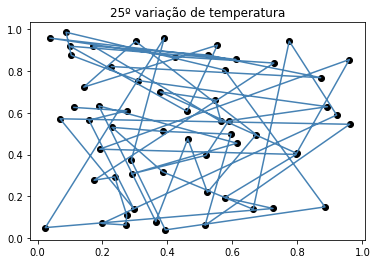

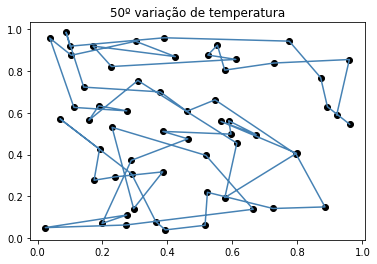

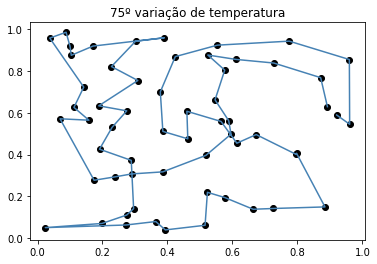

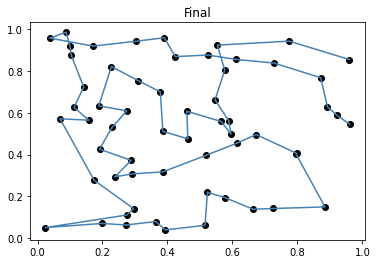

In [24]:
gera_todos_grafos_cidades(caminhos, x, y, N)

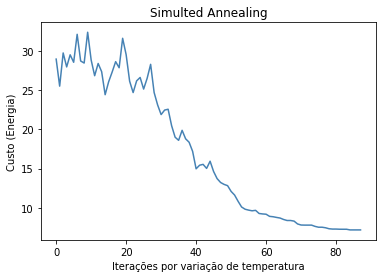

In [25]:
gera_grafico_custo_temperatura(custos)

Analisando os gráficos de Custos (Energia) em função do número de Iterações por variação de temperatura, podemos perceber que quanto maior o número de cidades, mais devagar é a convergência para o valor ótimo (ou quase ótimo para um número de cidades maior). Apesar disso, para 60 cidades ainda se mantem uma convergência relativamente rápida, além do algoritmo ser executado bem rapidamente.

Já utilizei o seu "concorrente", os algoritmos genéticos, porém sua implementação foi bem mais custosa, pois precisa ter uma forma onde mutações e crossovers ocorram satisfatoriamente e com um custo computacional baixo, já que essas operações serão executadas a todo momento, porém em todas minhas experiências foram algoritmos lentos e bem demorados, dificilmente chegando em ótimos globais.

O algoritmo foi bem legal de ser implementado, ver o caminho gerando entre as variações de temperaturas foi bastante interessante.